In [1]:
#Creating the quantum teleportation circuit for sending an Rx gate

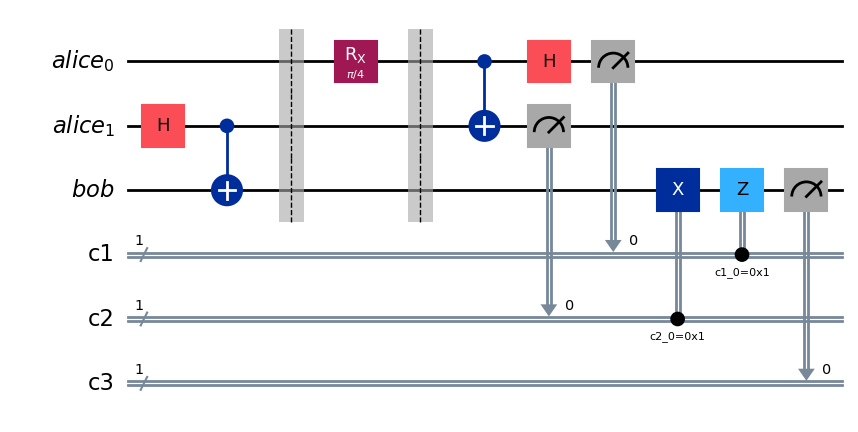

In [49]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from math import pi

Alice=QuantumRegister(2, name="alice")
Bob=QuantumRegister(1, name="bob")

c1 = ClassicalRegister(1, name="c1")
c2 = ClassicalRegister(1, name="c2")
c3 = ClassicalRegister(1, name="c3")

qc=QuantumCircuit(Alice, Bob, c1, c2, c3)

#Creating bell state
qc.h(Alice[1])
qc.cx(Alice[1],Bob[0])

qc.barrier()

#State to send
qc.rx(pi/4, Alice[0])

qc.barrier()

qc.cx(Alice[0], Alice[1])
qc.h(Alice[0])

#Applying measurements
qc.measure(Alice[1], c2[0])
qc.measure(Alice[0], c1[0])

#Apply x to bob if 2nd qubit measured 1
qc.x(Bob[0]).c_if(c2[0], 1)

#Apply z to bob if 1st qubit measured 1
qc.z(Bob[0]).c_if(c1[0], 1)

qc.measure(Bob[0],c3[0])

qc.draw('mpl')

In [50]:
#qubit-reuse in aersimulator

In [51]:
from qiskit import transpile
from qiskit_aer import AerSimulator

In [52]:
transpiled_qc = transpile(qc, backend=AerSimulator(), init_method="qubit_reuse")

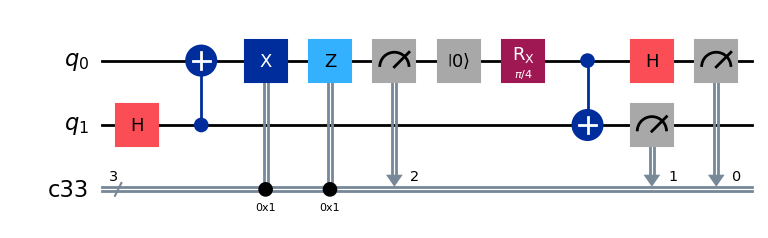

In [53]:
transpiled_qc.draw('mpl')

In [54]:
#qubit-reuse in generic backend

In [55]:
from qiskit.providers.fake_provider import GenericBackendV2

In [56]:
transpiled_qc1 = transpile(qc, backend=GenericBackendV2(num_qubits=3), init_method="qubit_reuse")

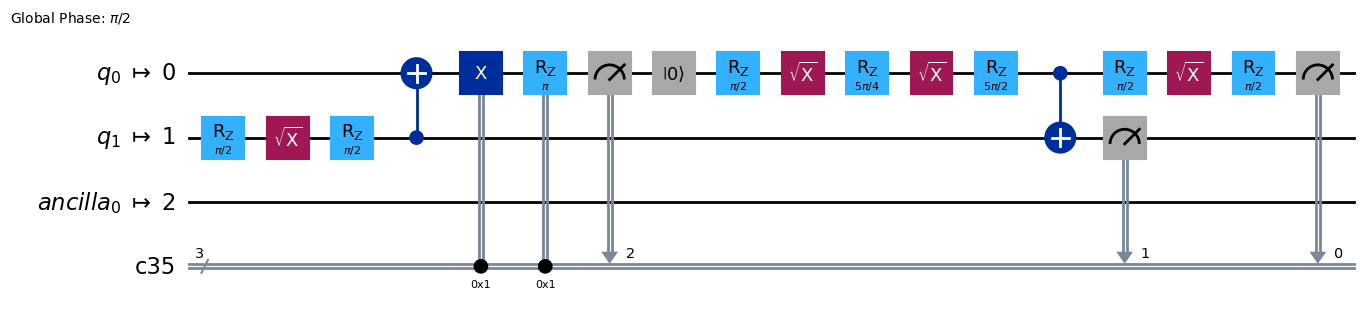

In [57]:
transpiled_qc1.draw('mpl')

In [58]:
#qubit-reuse in actual hardware(IBM sherbrooke)

In [59]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import transpile

backend_name = "ibm_sherbrooke"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)

transpiled_qc2= transpile(qc, backend, init_method="qubit_reuse")

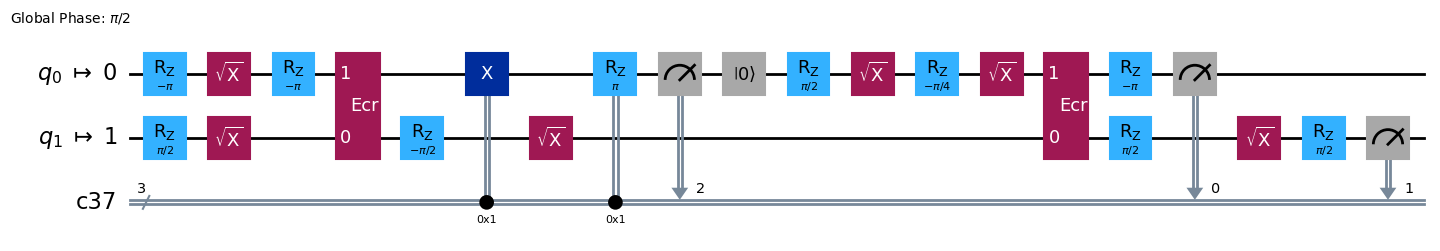

In [60]:
transpiled_qc2.draw('mpl', idle_wires=False)